# Project 02
넷플릭스 주가 데이터 분석

## F01 [데이터 전처리]  
**CSV 파일 읽기 및 필드 선택**  
Netflix 주가 데이터(NFLX.csv)를 Pandas를 사용해 DataFrame으로 읽어온다. 이때, 'Date', 'Open', 'High', 'Low', 'Close' 필드만 선택한다.

In [14]:
import pandas as pd

def get_netflix_csv():
    df = pd.read_csv('./archive/NFLX.csv', usecols=['Date', 'Open', 'High', 'Low', 'Close'])
    return df

In [15]:
df = get_netflix_csv()
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


## F02 [데이터 전처리]
**날짜 필터링**  
2021년 이후 데이터 필터링

In [16]:
def get_df_2021():
    df['Date'] = pd.to_datetime(df['Date'])
    df_2021 = df[df['Date'] >= '2021-01-01'].copy()
    return df_2021

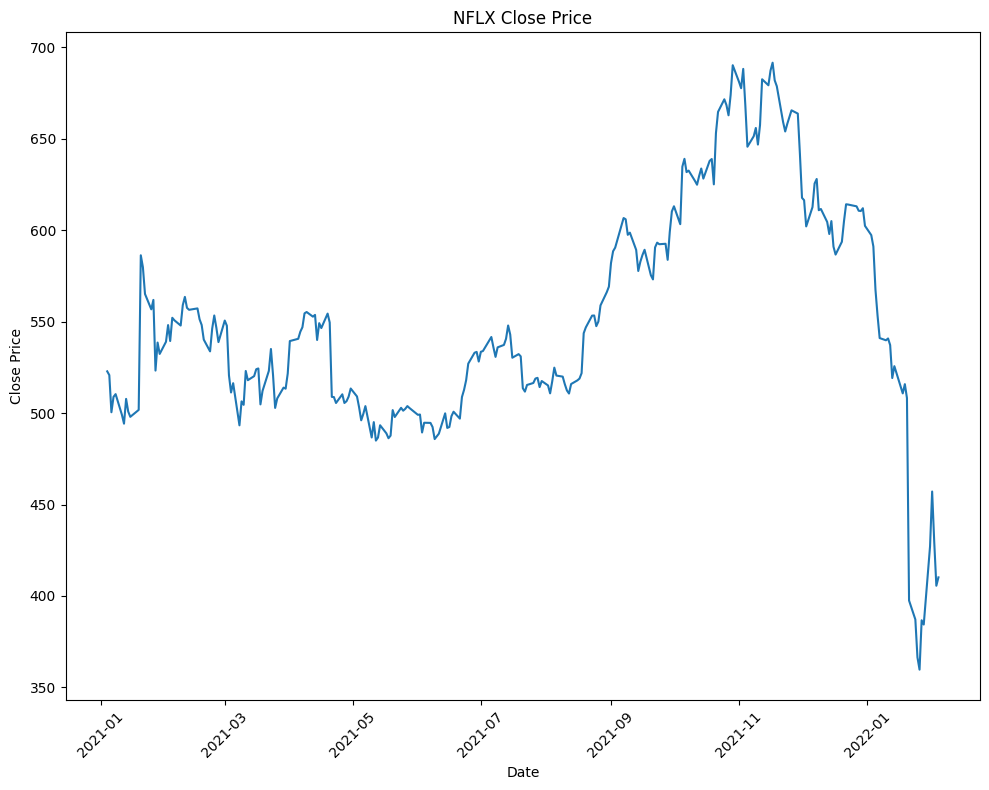

In [17]:
import matplotlib.pyplot as plt

df_2021 = get_df_2021()
plt.figure(figsize=(10, 8))
plt.plot(df_2021['Date'], df_2021['Close'])
plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## F03 [데이터 분석]
**최고/최저 종가 추출**  
2021년 이후 데이터에서 종가(Close)의 최대/최소 값 추출

In [ ]:
max_close = df_2021['Close'].max()
min_close = df_2021['Close'].min()

print("최고 종가:", max_close)
print("최저 종가:", min_close)

최고 종가: 691.690002
최저 종가: 359.700012


## F04 [데이터 분석]
**월별 평균 증가 계산**  
(1) 2021년 이후 데이터를 (2) 월별로 그룹화하여 (3) 평균 종가 계산
(4) 계산 결과를 DataFrame으로 저장하여 그래프로 시각화

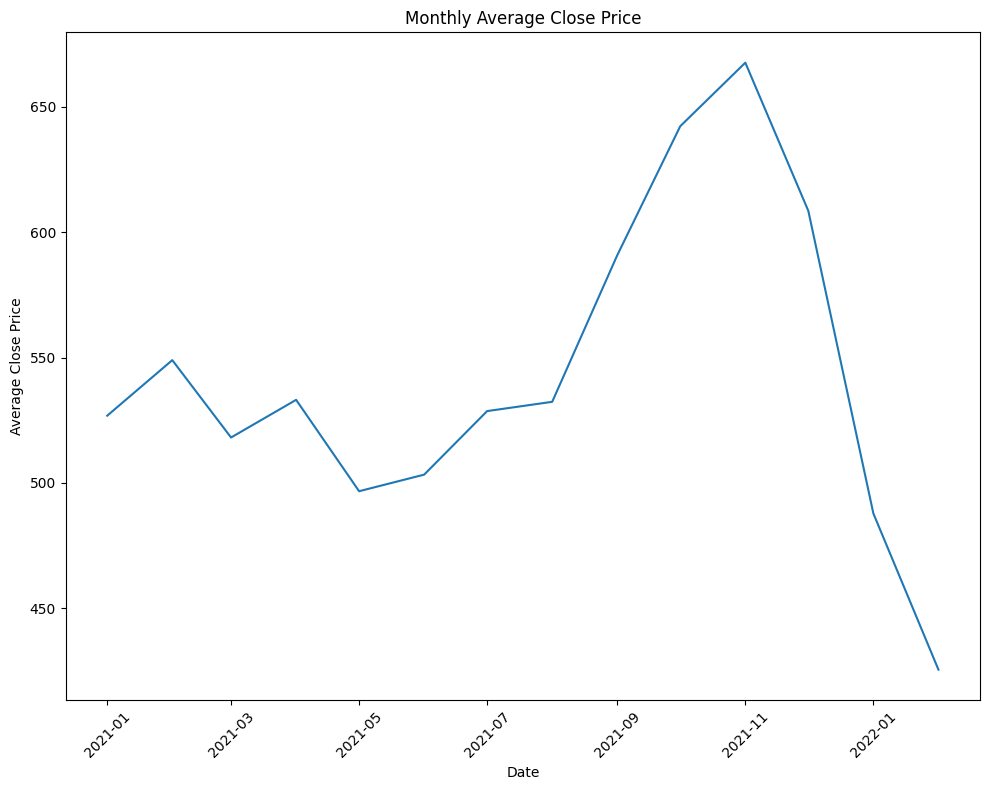

In [19]:
# Date 컬럼을 datetime으로 변환
df_2021['Date'] = pd.to_datetime(df_2021['Date'])

# Group by 'Month'
df_2021['YearMonth'] = df_2021['Date'].dt.to_period('M')
monthly_avg = df_2021.groupby('YearMonth')['Close'].mean().reset_index()
monthly_avg['Date'] = pd.to_datetime(monthly_avg['YearMonth'].astype(str))

# 그래프로 시각화
plt.figure(figsize=(10, 8))
plt.plot(monthly_avg['Date'], monthly_avg['Close'])
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## F05 [데이터 시각화]
**월별 최고/최저/종가 시각화**  
2022년 이후 데이터를 바탕으로 3가지 지표를 하나의 그래프에 시각화

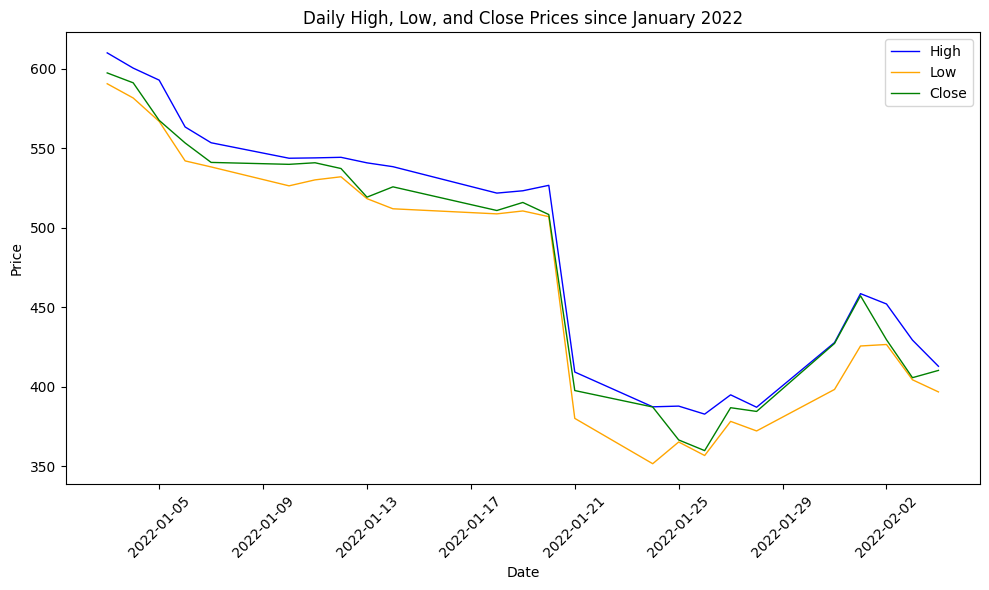

In [13]:
df_2022 = df[df['Date'] >= '2022-01-01'].copy()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df_2022['Date'], df_2022['High'], label='High', color='blue', linewidth=1)
plt.plot(df_2022['Date'], df_2022['Low'], label='Low', color='orange', linewidth=1)
plt.plot(df_2022['Date'], df_2022['Close'], label='Close', color='green', linewidth=1)

plt.title('Daily High, Low, and Close Prices since January 2022')
plt.xlabel('Date')
plt.ylabel('Price')

# X축 눈금: 1월 5일부터 4일 간격으로만 표시
start_tick = pd.to_datetime('2022-01-05')
end_tick = df_2022['Date'].max()
xticks = pd.date_range(start=start_tick, end=end_tick, freq='4D')

# 눈금 위치와 포맷 지정
plt.xticks(ticks=xticks, labels=[d.strftime('%Y-%m-%d') for d in xticks], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()